In [1]:
import os
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
import geopandas as gpd
import matplotlib.pyplot as plt

In [5]:
# Import earthquake data
URL = 'https://raw.githubusercontent.com/carmengg/eds220-hwk-1/main/data/earthquake_data.csv'
fp = os.path.join('data', 'cultural_boundaries', 'ne_110m_admin_0_countries.shp')
earthquake = pd.read_csv(URL)
boundaries = gpd.read_file(fp)

In [28]:
# Filter the earthquake data to only magnitude of 6.5 and greater
earthquake = earthquake[earthquake['mag'] >= 6.5]
eqk = earthquake[earthquake['type'] == 'earthquake']

In [46]:
# Create points from latitude and longitude
points = gpd.points_from_xy(eqk.longitude, 
                            eqk.latitude)

eqk = gpd.GeoDataFrame(eqk,
                             geometry = points,
                             crs = boundaries.crs)

# Rename the 'mag' column to 'Magnitude'
eqk = eqk.rename(columns = {'mag':'Magnitude'})
eqk.head()

,time,latitude,longitude,depth,Magnitude,id,place,type,geometry
9062,2014-01-01 16:03:29.000,-13.8633,167.2490,187.00,6.5,usc000lvb5,"32km W of Sola, Vanuatu",earthquake,POINT (167.24900 -13.86330)
12142,2014-02-18 09:27:13.120,14.6682,-58.9272,14.83,6.5,usc000mskt,"172km NNE of Bathsheba, Barbados",earthquake,POINT (-58.92720 14.66820)
14025,2014-02-12 09:19:49.060,35.9053,82.5864,10.00,6.9,usc000mnvj,"272km ESE of Hotan, China",earthquake,POINT (82.58640 35.90530)
15979,2014-02-07 08:40:13.550,-15.0691,167.3721,122.00,6.5,usc000mjye,"34km E of Port-Olry, Vanuatu",earthquake,POINT (167.37210 -15.06910)
17606,2014-02-02 09:26:37.820,-32.9076,-177.8806,44.26,6.5,usc000mfm0,"189km SSE of L'Esperance Rock, New Zealand",earthquake,POINT (-177.88060 -32.90760)


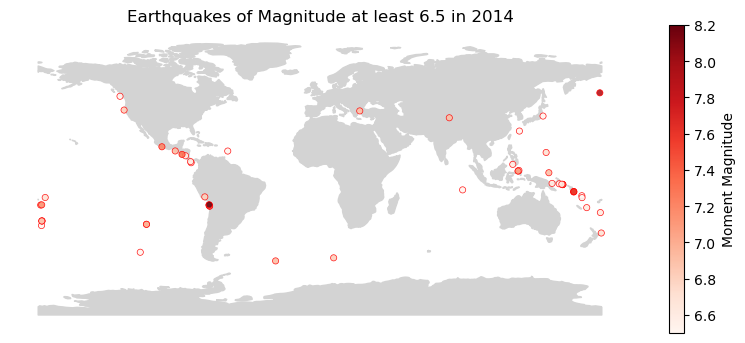

In [48]:
fig, ax = plt.subplots(figsize = (10,4))

# Remove axis for a cleaner map
ax.axis('off')

boundaries.plot(ax = ax,
                color = "lightgray",
                edgecolor = "lightgray")
eqk.plot(ax=ax,
        column = 'Magnitude',
        cmap='Reds', 
        linewidth=0.5,
        markersize=20, 
        alpha=0.9,  
        edgecolor='red',
        legend=True,
        legend_kwds = {'label': 'Moment Magnitude'})

plt.title('Earthquakes of Magnitude at least 6.5 in 2014')

plt.show()